In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

In [ ]:
args = {
    'batch_size': 20,
    'num_workers': 2,
    'num_classes': 10,
    'lr': 1e-4,
    'weight_decay': 5e-4,
    'num_epochs': 5
}

In [ ]:
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')

---

In [ ]:
train_set = datasets.MNIST(root='./',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_set = datasets.MNIST(root='./',
                           train=False,
                           transform=transforms.ToTensor(),
                           download=False)
print(len(train_set), len(test_set))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 61.6MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.08MB/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 15.1MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.05MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

60000 10000


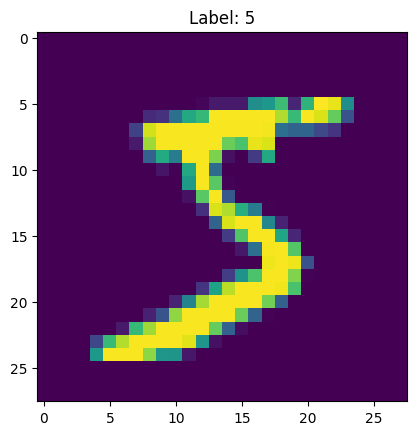

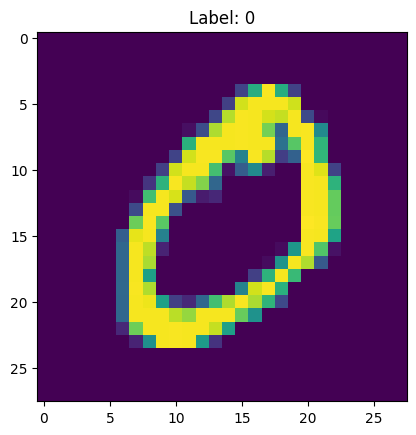

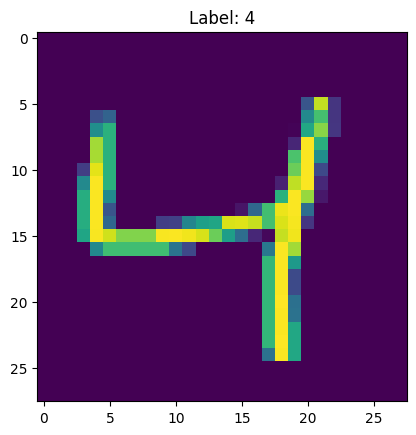

In [ ]:
for i in range(3):
    image, label = train_set[i]

    plt.figure()
    plt.imshow(image[0])
    plt.title('Label: ' + str(label))

---

In [ ]:
train_loader = DataLoader(train_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers'])

test_loader = DataLoader(test_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers'])

torch.Size([20, 1, 28, 28]) torch.Size([20])


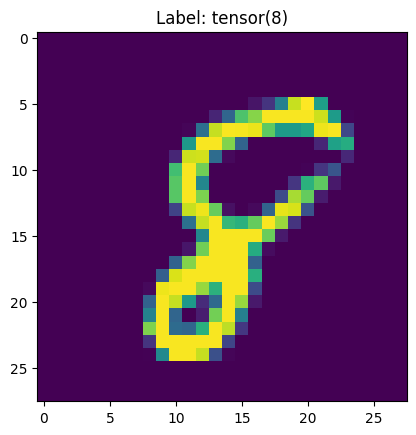

In [ ]:
for batch in train_loader:
    data, label = batch
    print(data.size(), label.size())

    plt.imshow(data[0][0])
    plt.title('Label: ' + str(label[0]))

    break

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.features = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU()
        )
        self.output  = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax()

    def forward(self, X):
        X = X.view(X.size(0), -1)
        feature = self.features(X)
        output  = self.softmax(self.output(feature))
        return output

In [ ]:
input_size  = 28 * 28
hidden_size = 128
output_size = 10

In [ ]:
net = MLP(input_size, hidden_size, output_size).to(args['device'])
print(net)

MLP(
  (features): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


In [ ]:
criterion = nn.CrossEntropyLoss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

In [ ]:
for epoch in range(args['num_epochs']):
    epoch_loss = []
    for batch in train_loader:
        data, label = batch

        data = data.to(args['device'])
        label = label.to(args['device'])

        pred = net(data)
        loss = criterion(pred, label)
        epoch_loss.append(loss.cpu().data)

        loss.backward()
        optimizer.step()

    epoch_loss = np.asarray(epoch_loss)
    print(f'Epoca {epoch}, Loss: {epoch_loss.mean():.4f} +\- {epoch_loss.std()}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoca 0, Loss: 1.7144 +\- 0.1514786034822464
Epoca 1, Loss: 1.6875 +\- 0.097865991294384
Epoca 2, Loss: 1.7022 +\- 0.09492558985948563
Epoca 3, Loss: 1.7595 +\- 0.10114073008298874
Epoca 4, Loss: 1.7928 +\- 0.10673553496599197
